In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/housing.csv")
print("Housing.csv describe")
data.describe()

Housing.csv describe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print("Housing.csv info")
data.info()

Housing.csv info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


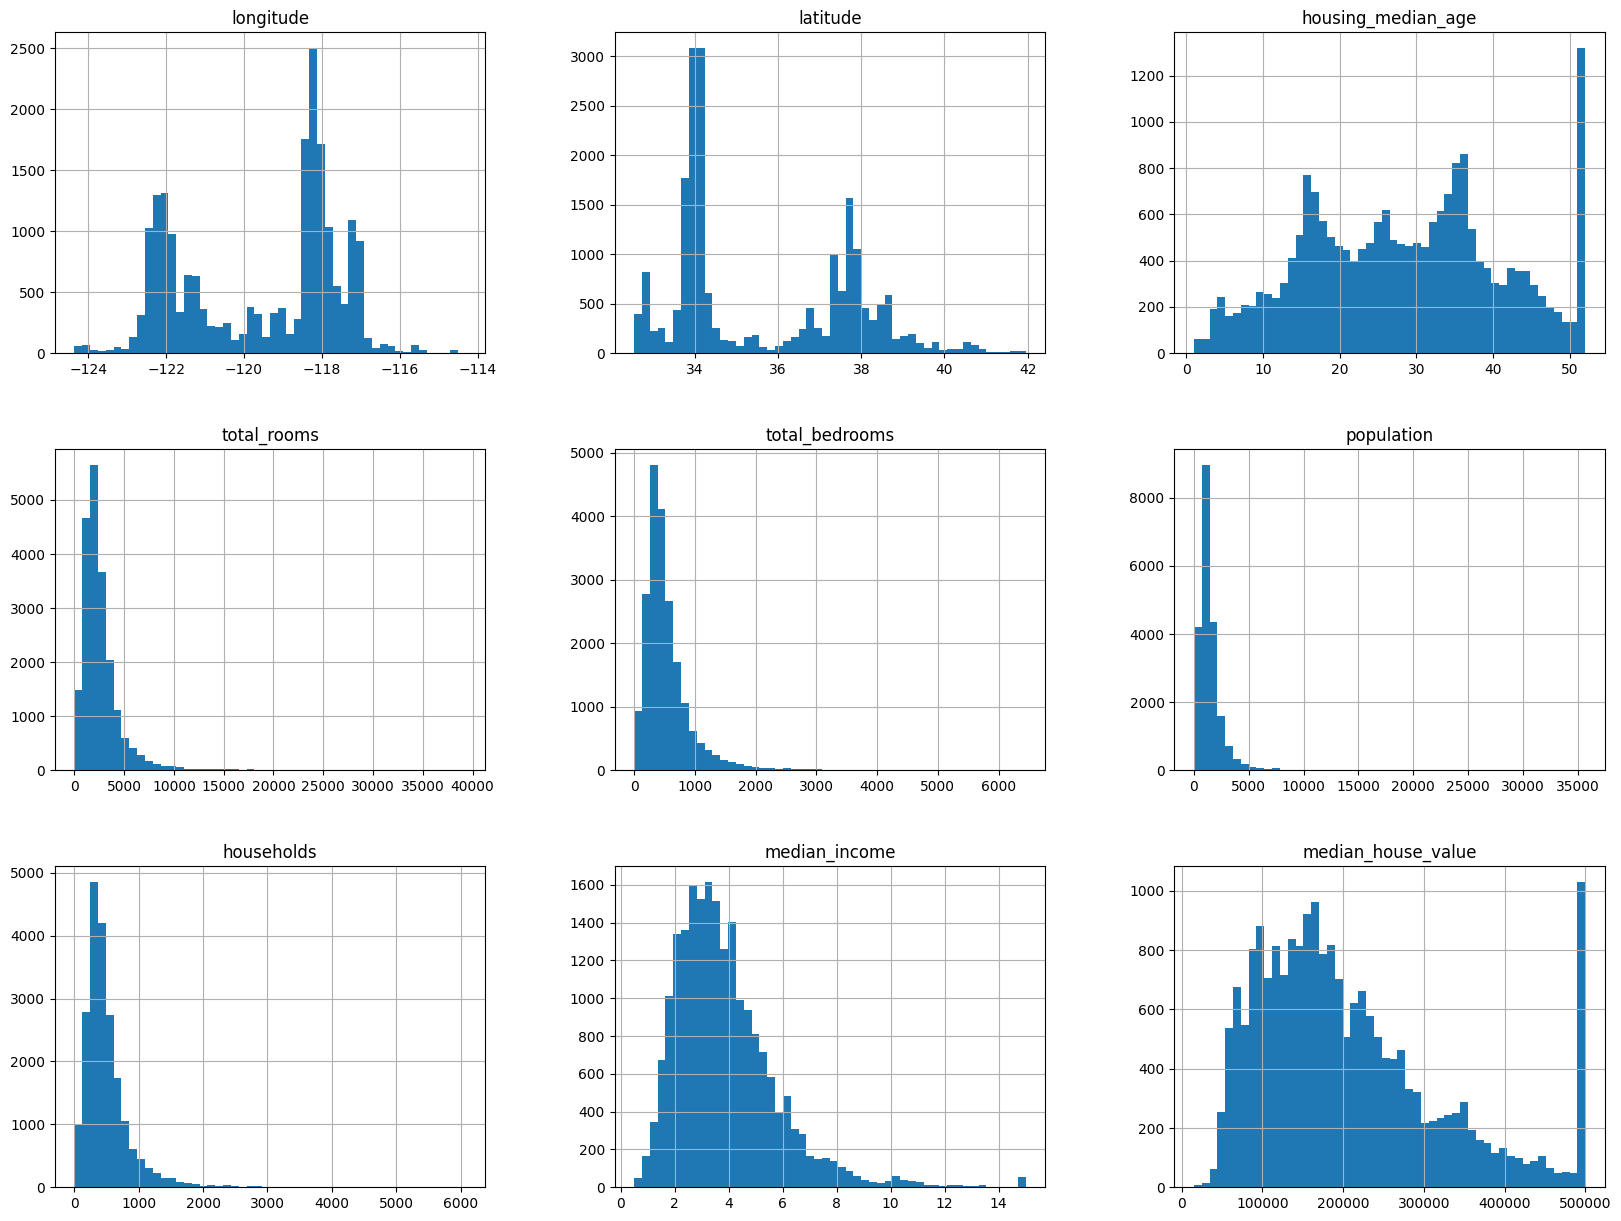

In [13]:
# Plot histograms
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Random Split
train_set_random, test_set_random = train_test_split(data, test_size=0.2, random_state=42)

# Stratified Split based on median_income
# Create income categories
data["income_cat"] = pd.cut(data["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

# Perform stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    # Use .copy() to ensure we work with a new DataFrame, avoiding the warning
    train_set_strat = data.iloc[train_index].copy()
    test_set_strat = data.iloc[test_index].copy()

# Drop the temporary income_cat column from both sets
train_set_strat = train_set_strat.drop("income_cat", axis=1)
test_set_strat = test_set_strat.drop("income_cat", axis=1)

# Verify sizes
print("Random Test Set Size:", len(test_set_random))
print("Stratified Test Set Size:", len(test_set_strat))

# Optional: Display the first few rows to confirm
print("\nStratified Training Set Sample:")
print(train_set_strat.head())
print("\nStratified Test Set Sample:")
print(test_set_strat.head())

Random Test Set Size: 4128
Stratified Test Set Size: 4128

Stratified Training Set Sample:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   

      ocean_proximity  
1

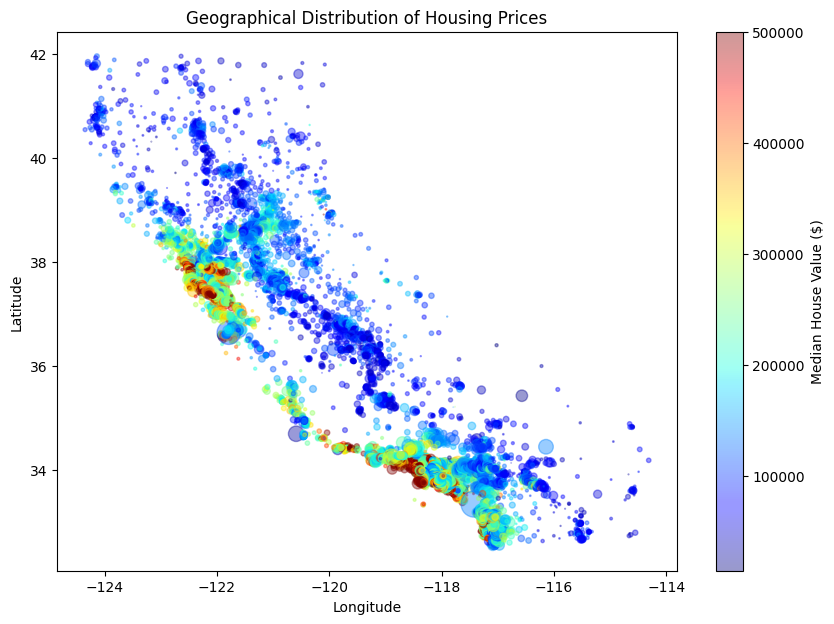

In [14]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 7))
plt.scatter(data["longitude"], data["latitude"], s=data["population"]/100, c=data["median_house_value"],
            cmap="jet", alpha=0.4)
plt.colorbar(label="Median House Value ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Housing Prices")
plt.show()

Correlation with median_house_value:
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


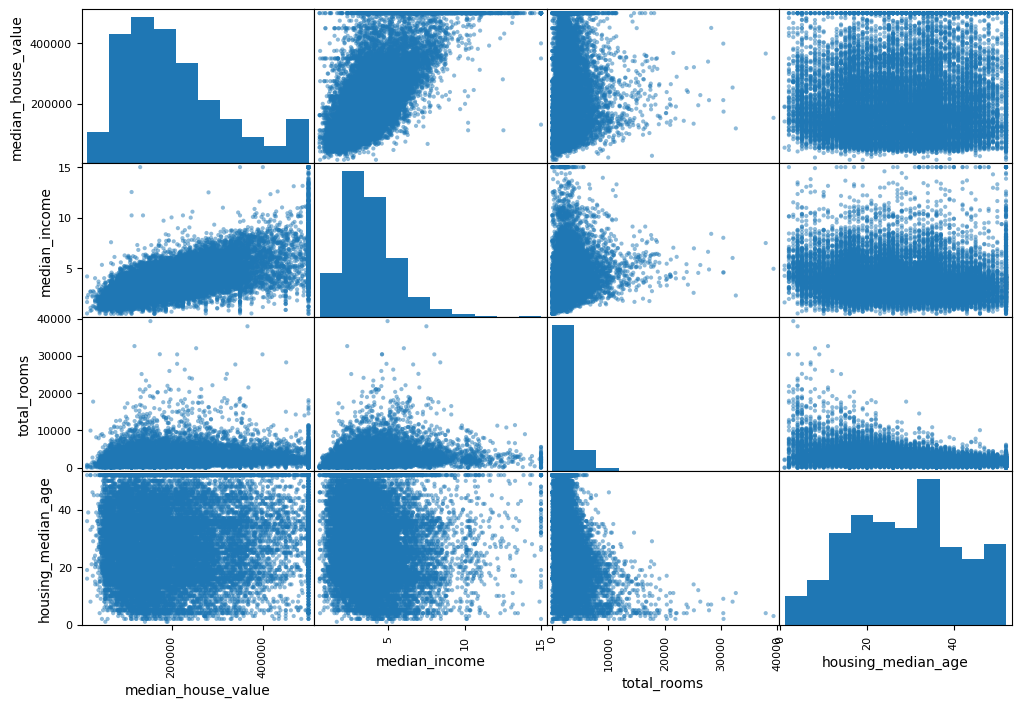

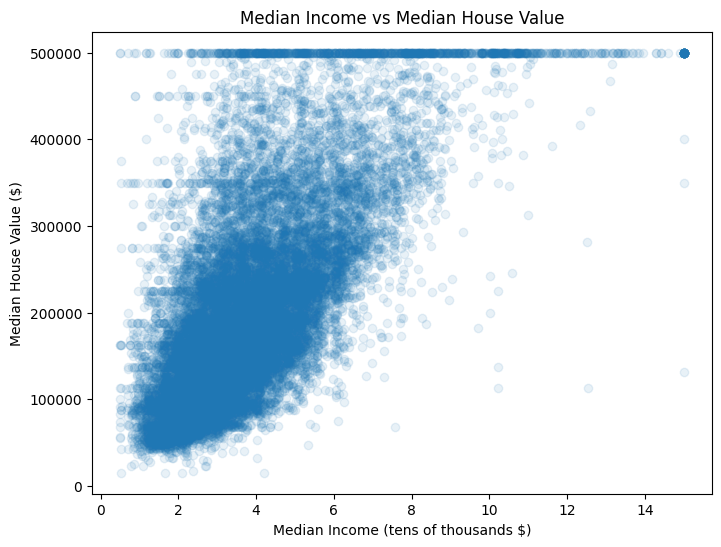

In [16]:
from pandas.plotting import scatter_matrix

# Correlation matrix
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

# correlation matrix
corr_matrix = numerical_data.corr()
print("Correlation with median_house_value:\n", corr_matrix["median_house_value"].sort_values(ascending=False))

# Plot correlation scatter matrix for top features
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

# Plot for the highest correlating feature: median_income
plt.figure(figsize=(8, 6))
plt.scatter(data["median_income"], data["median_house_value"], alpha=0.1)
plt.xlabel("Median Income (tens of thousands $)")
plt.ylabel("Median House Value ($)")
plt.title("Median Income vs Median House Value")
plt.show()

New Correlations with median_house_value:
 median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


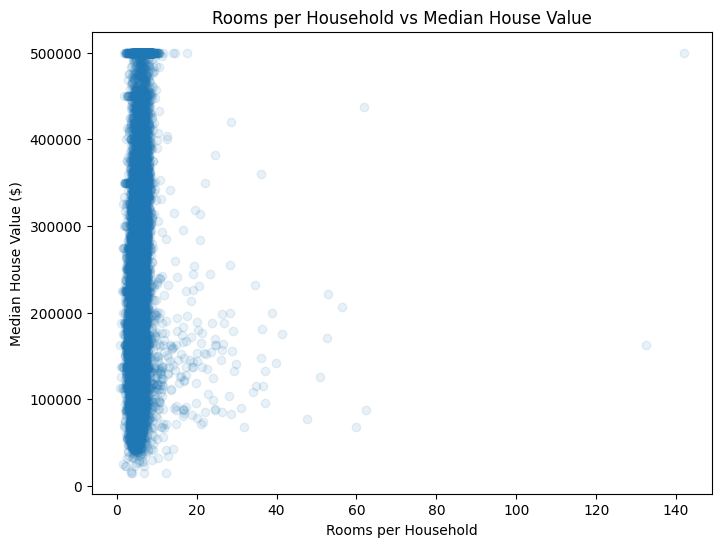

In [18]:
# Create combined features
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

# Check new correlations
numerical_data = data.select_dtypes(include=np.number)

# correlation matrix
corr_matrix = numerical_data.corr()
print("New Correlations with median_house_value:\n", corr_matrix["median_house_value"].sort_values(ascending=False))

# Plot rooms_per_household vs median_house_value
plt.figure(figsize=(8, 6))
plt.scatter(data["rooms_per_household"], data["median_house_value"], alpha=0.1)
plt.xlabel("Rooms per Household")
plt.ylabel("Median House Value ($)")
plt.title("Rooms per Household vs Median House Value")
plt.show()

In [19]:
# Check missing values
print("Missing Values:\n", data.isnull().sum())

# Impute missing total_bedrooms with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
data["total_bedrooms"] = imputer.fit_transform(data[["total_bedrooms"]])

# Verify cleaning
print("\nAfter Cleaning, Missing Values:\n", data.isnull().sum())

Missing Values:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

After Cleaning, Missing Values:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
ocean_encoded = encoder.fit_transform(data[["ocean_proximity"]])
ocean_encoded_df = pd.DataFrame(ocean_encoded, columns=encoder.get_feature_names_out(["ocean_proximity"]))

# Combine with original data, dropping ocean_proximity
data_encoded = pd.concat([data.drop("ocean_proximity", axis=1), ocean_encoded_df], axis=1)
print("Encoded Data Head:\n", data_encoded.head())

Encoded Data Head:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value income_cat  \
0       322.0       126.0         8.3252            452600.0          5   
1      2401.0      1138.0         8.3014            358500.0          5   
2       496.0       177.0         7.2574            352100.0          5   
3       558.0       219.0         5.6431            341300.0          4   
4       565.0       259.0         3.8462            342200.0          3   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0      

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for combined features
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]  # total_rooms / households
        bedrooms_per_room = X[:, 4] / X[:, 3]    # total_bedrooms / total_rooms
        population_per_household = X[:, 5] / X[:, 6]  # population / households
        return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]

# Define numeric and categorical features
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms",
                "total_bedrooms", "population", "households", "median_income"]
cat_features = ["ocean_proximity"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

# Full pipeline with ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

# Prepare data (split features and target)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Apply pipeline
X_prepared = full_pipeline.fit_transform(X)

# Display shape and sample of prepared data
print("Prepared Data Shape:", X_prepared.shape)
print("Sample of Prepared Data:\n", X_prepared[:5])

Prepared Data Shape: (20640, 16)
Sample of Prepared Data:
 [[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  0.62855945 -1.02998783 -0.04959654  0.
   0.          0.          1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  0.32704136 -0.8888972  -0.09251223  0.
   0.          0.          1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.15562047 -1.29168566 -0.02584253  0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  0.15696608 -0.4496128  -0.0503293   0.
   0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61242263 -0.75984669
  -0.62915718 -0.012881    0.3447108  -0.63908657 -0.08561576  0.
   0.          0.          1.         